# Data Preprocessing
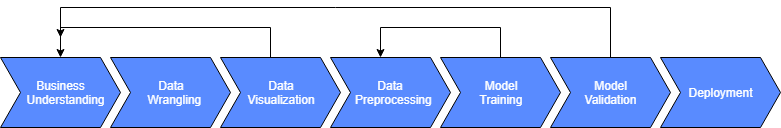

### Common Imports

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Introduction to PreProcessing
- Learning algorithms have affinity towards certain pattern of data
- Unscaled or unstandardized data have might have unacceptable prediction
- Learning algorithms understands only number, converting text image to number is required
- Preprocessing refers to transformation before feeding to machine learning


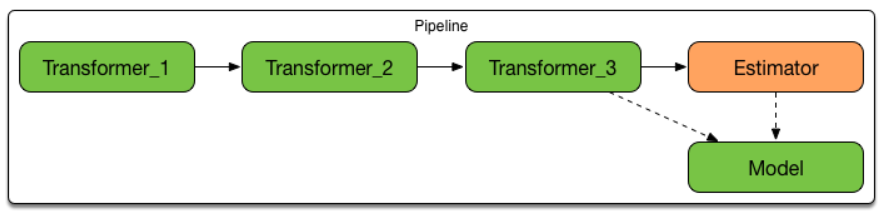

## 2. StandardScaler
Standardization is a preprocessing method used to transform continuous data to make it look normally distributed.
- The StandardScaler assumes your data is normally distributed (continuous numerical data) within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
- Calculate - Subtract mean of column & div by standard deviation

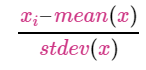

**When to standardize:**
- Models in linear space
- Dataset features have high variance
- If data is not normally distributed, this is not the best scaler to use

In [77]:
# Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

<AxesSubplot:ylabel='Density'>

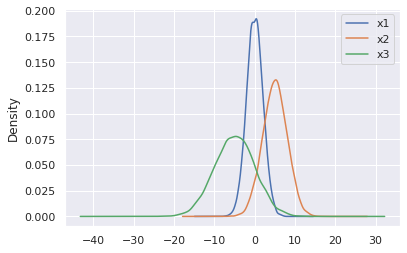

In [78]:
# Plotting

df.plot.kde()

In [79]:
from sklearn.preprocessing import  StandardScaler
ss = StandardScaler()

In [80]:
data_tf = ss.fit_transform(df)

In [81]:
df = pd.DataFrame(data_tf, columns=['x1', 'x2', 'x3'])

In [82]:
df

,x1,x2,x3
0,2.377472,0.804700,-1.759502
1,0.462474,0.077366,-1.043252
2,-1.443073,0.554063,-0.561279
3,0.582403,0.508922,0.714892
4,0.101857,0.085453,0.082694
...,...,...,...
9995,0.655606,0.808157,-0.055730
9996,0.483150,0.224391,-0.048275
9997,-0.882656,-2.209886,0.640887
9998,-0.579278,0.622971,0.487101


<AxesSubplot:ylabel='Density'>

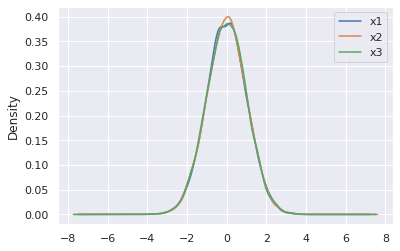

In [83]:
df.plot.kde()

## 3. MinMaxScaler
- One of the most popular
- Calculate - Subtract min of column & div by difference between max & min

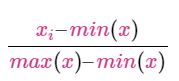

- Data shifts between 0 & 1
- If distribution not suitable for StandardScaler, this scaler works out
- Sensitive to outliers

In [84]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    #negative skew
    'x2': np.random.beta(8, 2, 1000) * 40,
    #no skew
    'x3': np.random.normal(50, 3, 1000)
})

<AxesSubplot:ylabel='Density'>

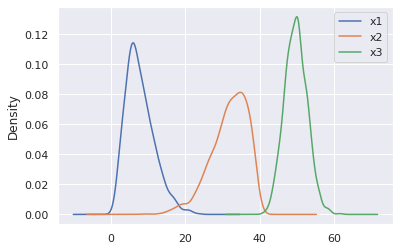

In [85]:
df.plot.kde()

In [86]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [87]:
data_tf = mm.fit_transform(df)

<AxesSubplot:ylabel='Density'>

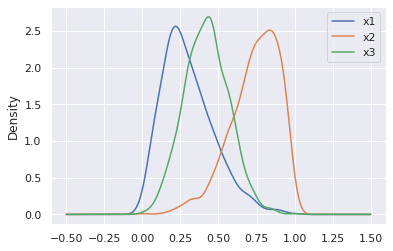

In [88]:
df = pd.DataFrame(data_tf, columns=['x1', 'x2', 'x3'])
df.plot.kde()

## 4. Robust Scaler
- Suited for data with outliers
- Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile

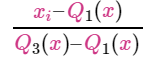

In [89]:
df = pd.DataFrame({
    # Distribution with lower outlier
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with highr outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)])
})

<AxesSubplot:ylabel='Density'>

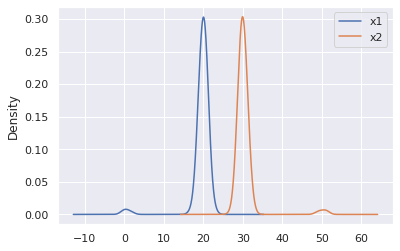

In [90]:
df.plot.kde()

In [91]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [92]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1', 'x2'])

<AxesSubplot:ylabel='Density'>

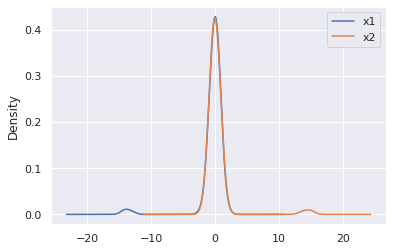

In [93]:
df.plot.kde()

## 5. Normalizer
- Each parameter value is obtained by dividing by magnitude

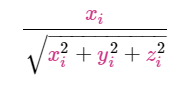

In [94]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

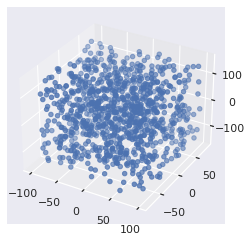

In [95]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [96]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [97]:
data_tf = normalizer.fit_transform(df)

In [98]:
df = pd.DataFrame(data_tf, columns=['x1', 'y1', 'z1'])

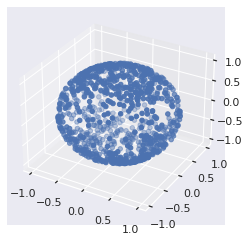

In [99]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
- Thresholding numerical values to binary values ( 0 or 1 )
- A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [100]:
x = np.array([[1., -1., 2.],
             [2., 0., 0.],
             [0., 1., -1.]])

In [101]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [102]:
data_tf = binarizer.fit_transform(x)

In [103]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values

#### Encoding Ordinal Values
- Ordinal Values - Low, Medium & High. Relationship between values
- LabelEncoding with right mapping


In [104]:
df = pd.DataFrame({
    'Age': [33, 44, 22, 44, 55, 22],
    'Income': ['Low', 'Low', 'High', 'Medium', 'Medium', 'High']
})

In [105]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [106]:
df.Income.map({'Low': 1, 'Medium': 2, 'High': 3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### Encoding Nominal Values
- Nominal Values - Male, Female. No relationship between data
- One Hot Encoding for converting data into one-hot vector

In [107]:
df = pd.DataFrame({
    'Age': [33, 44, 22, 44, 55, 22],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male']
})

In [108]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [109]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
onehot = OneHotEncoder()

In [110]:
df['gender_tf'] = le.fit_transform(df.Gender)

In [111]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [112]:
onehot.fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 8. Imputation
- Missing values cannot be processed by learning algorithms
- Imputers can be used to infer value of missing data from existing data

In [113]:
df = pd.DataFrame({
    'A': [1,2,3,4,np.nan,7],
    'B': [3,4,1,np.nan,4,5]
})

In [114]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [115]:
imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

## 9. Polynomial Features
- Deriving non-linear feature by coverting data into higher degree
- Used with polynomial regression to learn model of higher degree

In [116]:
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [2, 3, 4, 5, 6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [117]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures()

In [118]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

## 10. Custom Transformer
- Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing
- FunctionTransformer is used to create one Transformer
- validate = False, is required for string columns

In [119]:
from sklearn.preprocessing import FunctionTransformer

In [120]:
def mapping(x):
    x['Age'] = x['Age'] + 2
    x['Counter'] = x['Counter'] * 2
    return x

In [121]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [122]:
df = pd.DataFrame({
    'Age': [33, 44, 22, 44, 55, 22],
    'Counter': [3, 4, 2, 4, 5, 2],
})
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [123]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## 11. Text Processing
- Perhaps one of the most common information
- Learning algorithms don't understand text but only numbers
- Below menthods convert text to numbers


## 12. CountVectorizer
- Each column represents one word, count refers to frequency of the word
- Sequence of words are not maintained

#### Hyperparameters
- n_grams - Number of words considered for each column
- stop_words - words not considered
- vocabulary - only words considered

In [124]:
corpus = [
    'This is the first document awesome food.',
    'This is the second second document.',
    'And the third one the is mission impossible.',
    'Is this the first document?',
]
df = pd.DataFrame({'Text': corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [125]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [126]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]])

In [127]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [128]:
cv = CountVectorizer(stop_words=['the', 'is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]])

In [129]:
cv = CountVectorizer(vocabulary=['mission', 'food', 'second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]])

In [130]:
cv = CountVectorizer(ngram_range=[1,3])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1]])

In [131]:
cv.vocabulary_

{'this': 42,
 'is': 13,
 'the': 30,
 'first': 8,
 'document': 5,
 'awesome': 3,
 'food': 11,
 'this is': 43,
 'is the': 16,
 'the first': 31,
 'first document': 9,
 'document awesome': 6,
 'awesome food': 4,
 'this is the': 44,
 'is the first': 17,
 'the first document': 32,
 'first document awesome': 10,
 'document awesome food': 7,
 'second': 26,
 'the second': 35,
 'second second': 28,
 'second document': 27,
 'is the second': 18,
 'the second second': 36,
 'second second document': 29,
 'and': 0,
 'third': 39,
 'one': 23,
 'mission': 21,
 'impossible': 12,
 'and the': 1,
 'the third': 37,
 'third one': 40,
 'one the': 24,
 'the is': 33,
 'is mission': 14,
 'mission impossible': 22,
 'and the third': 2,
 'the third one': 38,
 'third one the': 41,
 'one the is': 25,
 'the is mission': 34,
 'is mission impossible': 15,
 'is this': 19,
 'this the': 45,
 'is this the': 20,
 'this the first': 46}

## 13. TfIdf Vectorizer
### Term Frequency Inverse Document Frequency
- Words occuring more frequently in a doc versus entire corpus is considered more important
- The importance is in scale of 0 & 1

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [133]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [134]:
vectorizer.get_feature_names()

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['awesome', 'document', 'food', 'impossible', 'mission', 'second']

## 14. Hashing Vectorizer
- All above techniques converts data into table where each word is converted to column
- Learning on data with millions of columns is difficult to process
- HashingVectorizer is an useful technique for out-of-core learning
- Multiple words are hashed to limited column
- Limitation - Hashed value to word mapping is not possible

In [135]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [136]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

## 15. Image Processing using skimage
- skimage doesn't come with anaconda. install with 'pip install skimage'
- Images should be converted from 0-255 scale to 0-1 scale
- skimage takes image path & returns numpy array
- images consist of 3 dimension

In [140]:
from skimage.io import imread, imshow

In [141]:
image = imread('google.jpg')

In [143]:
image.shape   #height, width, colors range

(768, 1200, 3)

In [144]:
image[1]

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

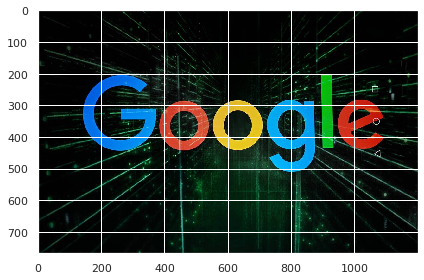

In [145]:
imshow(image)

In [146]:
from skimage.color import rgb2gray

In [147]:
rgb2gray(image).shape

(768, 1200)

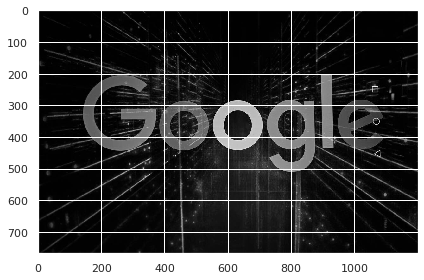

In [148]:
imshow(rgb2gray(image))

In [151]:
from skimage.transform import resize

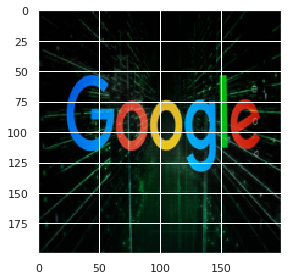

In [152]:
imshow(resize(image, (200,200)))